In [1]:
import pandas as pd

In [2]:
load=pd.read_excel('Target_Customer_Prediction.xlsx')

In [3]:
load.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Offer_acceptance
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,1


In [4]:
load.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Offer_acceptance      0
dtype: int64

In [5]:
x=load.drop(['Offer_acceptance'],axis=1)
y=load['Offer_acceptance']

In [6]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Offer_acceptance, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [10]:
from sklearn import tree

In [11]:
dtree=tree.DecisionTreeClassifier()

In [12]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
y_pred=dtree.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
comp_df=x_test.copy()
comp_df['Pred']=y_pred
comp_df['Act']=y_test

comp_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Pred,Act
2104,40,14,58,4,0.2,3,0,0,0,1,0,0,0
521,48,24,75,4,1.4,2,0,0,0,1,0,0,1
4811,36,12,123,2,3.0,3,0,0,0,0,0,1,1
1539,29,5,21,3,0.9,3,119,0,0,0,0,0,0
2473,57,32,39,4,0.9,1,147,0,0,0,0,0,1


In [15]:
from sklearn import metrics

In [16]:
metrics.accuracy_score(y_test,y_pred)

0.8106666666666666

In [17]:
feature_imp=pd.DataFrame()
feature_imp['col']=x.columns
feature_imp['Imp']=dtree.feature_importances_*100

feature_imp.sort_values('Imp',ascending=True)

,col,Imp
8,CD Account,0.633640
10,CreditCard,0.731154
7,Securities Account,0.897419
9,Online,2.405198
6,Mortgage,5.467395
0,Age,8.419467
1,Experience,9.089645
3,Family,10.769093
4,CCAvg,11.323584
5,Education,19.918506


In [18]:
x=x.drop(['CreditCard','Securities Account','CD Account','Online','Mortgage'],axis=1)

In [19]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education
0,25,1,49,4,1.6,1
1,45,19,34,3,1.5,1
2,39,15,11,1,1.0,1
3,35,9,100,1,2.7,2
4,35,8,45,4,1.0,2


In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
param_grid={ "criterion" : ['gini','entropy'],
            "max_features" :[1,2,3,4,5],
            "min_samples_leaf" :[5,3,2,4,1],
            "splitter" :['best','random'],
            "max_depth" :[3,7,10,15]
           }

In [22]:
optimized_tree=GridSearchCV(dtree,param_grid,scoring='accuracy',verbose=2,cv=5)

In [23]:
optimized_tree.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=1, min_samples_leaf=2, s

[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=2, min_samples_leaf=4

[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=3, min_samples_leaf=4, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=3, min_sample

[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=4, min_samples_leaf=1, sp

[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=3, max_features=5, min_samples_le

[CV]  criterion=gini, max_depth=7, max_features=1, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=1, min_samples_leaf=4, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=1, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=1, min_samples_leaf=1

[CV]  criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=3, min_sample

[CV]  criterion=gini, max_depth=7, max_features=4, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=4, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=4, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=4, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=4, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=4, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=4, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=4, min_sample

[CV]  criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=best 
[CV]  criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=gini, max_depth=7, max_features=5, min_samples_leaf=5

[CV]  criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=1, min_sam

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=2, min

[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=3, min_samples

[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=10, max_features=4,

[CV]  criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=5, min_samples_leaf=2, splitter=random 
[CV]  criterion=gini, max_depth=10, max_feature

[CV]  criterion=gini, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=1, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=1, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=1, min_sam

[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=2, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=2, min

[CV]  criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=3, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=3, min

[CV]  criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=gini, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=4, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_feature

[CV]  criterion=gini, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=gini, max_depth=15, max_features=5, min_samples

[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=4, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=4, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, ma

[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, m

[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=5, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=3, m

[CV]  criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=1, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, ma

[CV]  criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=2, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, ma

[CV]  criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=best 
[CV]  criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=7, max_features=5, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=1, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_

[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_dept

[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=3, min_samples_leaf=1, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=5, splitter=best 
[CV]  criterion=e

[CV]  criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=3, splitter=best 
[CV]  criterion=e

[CV]  criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=1, min_samples_leaf=3, splitter=random 
[CV]  criterion=e

[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=2, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_dept

[CV]  criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=best 
[CV]  criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=3, min_samples_leaf=5, splitter=random 
[CV]  criterion=entro

[CV]  criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=best 
[CV]  criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=4, min_samples_leaf=3, splitter=random 
[CV]  criterion=entro

[CV]  criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random 
[CV]  criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=3, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=15, max_features=5, min_samples_leaf=2, splitter=best 
[CV]  criterion=entro

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   17.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 10, 15],
                       

In [24]:
optimized_tree.best_score_

0.8945714285714286

In [25]:
optimized_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 4,
 'splitter': 'best'}

In [26]:
final_model=optimized_tree.best_estimator_

In [27]:
final_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
y_predict=final_model.predict(x_test)

In [31]:
metrics.accuracy_score(y_test,y_pred)

0.8106666666666666

In [36]:
y_pred_prob=final_model.predict_proba(x_test)
cust_likelihood=y_pred_prob[:,1]*100
cust_likelihood

array([10.11946592, 10.11946592, 95.83333333, ..., 10.11946592,
       10.11946592,  9.375     ])

In [38]:
comp_df=x_test.copy()
comp_df['Actual_value']=y_test
comp_df['Predicted_value']=y_predict
comp_df['propensity']=cust_likelihood
comp_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Actual_value,Predicted_value,propensity
2104,40,14,58,4,0.2,3,0,0,0,1,0,0,0,10.119466
521,48,24,75,4,1.4,2,0,0,0,1,0,1,0,10.119466
4811,36,12,123,2,3.0,3,0,0,0,0,0,1,1,95.833333
1539,29,5,21,3,0.9,3,119,0,0,0,0,0,0,12.977099
2473,57,32,39,4,0.9,1,147,0,0,0,0,1,0,10.119466


In [39]:
metrics.recall_score(y_test,y_predict)

0.43157894736842106

In [40]:
metrics.precision_score(y_test,y_predict)

0.7935483870967742

In [41]:
y_test.value_counts()

0    1215
1     285
Name: Offer_acceptance, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,y_predict)

array([[1183,   32],
       [ 162,  123]], dtype=int64)

In [44]:
final_model.fit(x_train,y_train)
y_predict=final_model.predict(x_test)
metrics.accuracy_score(y_test,y_predict)

0.878

In [45]:
import numpy as np
k=100
model=[]
perf=[]
for i in range(k):
    model.append(final_model.fit(x_train,y_train))
    y_predict=final_model.predict(x_test)
    perf.append(metrics.accuracy_score(y_test,y_predict))
perf=np.array(perf)
print(perf)
print("avg performance :",perf.mean())
print("model variance :",perf.std())

[0.88733333 0.87733333 0.884      0.87733333 0.88466667 0.88266667
 0.88       0.87666667 0.88866667 0.87666667 0.89       0.88333333
 0.882      0.88933333 0.878      0.87666667 0.87666667 0.878
 0.88       0.88133333 0.88266667 0.87466667 0.88066667 0.88066667
 0.88933333 0.88266667 0.882      0.878      0.87066667 0.882
 0.87533333 0.882      0.88266667 0.886      0.88066667 0.884
 0.87733333 0.88       0.884      0.88866667 0.87733333 0.88133333
 0.88333333 0.88333333 0.88133333 0.87333333 0.86066667 0.88133333
 0.88333333 0.88466667 0.88266667 0.88933333 0.878      0.86466667
 0.84666667 0.88266667 0.882      0.872      0.876      0.884
 0.88133333 0.88666667 0.88533333 0.88133333 0.88466667 0.88333333
 0.88666667 0.88       0.87933333 0.88933333 0.87933333 0.87933333
 0.88666667 0.88266667 0.88066667 0.87066667 0.86333333 0.87866667
 0.884      0.88666667 0.89066667 0.88266667 0.88866667 0.876
 0.87866667 0.85       0.88066667 0.884      0.88133333 0.86666667
 0.88333333 0.878666

In [46]:
avg_perf=np.zeros_like(perf,dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026 0.88026
 0.88026]


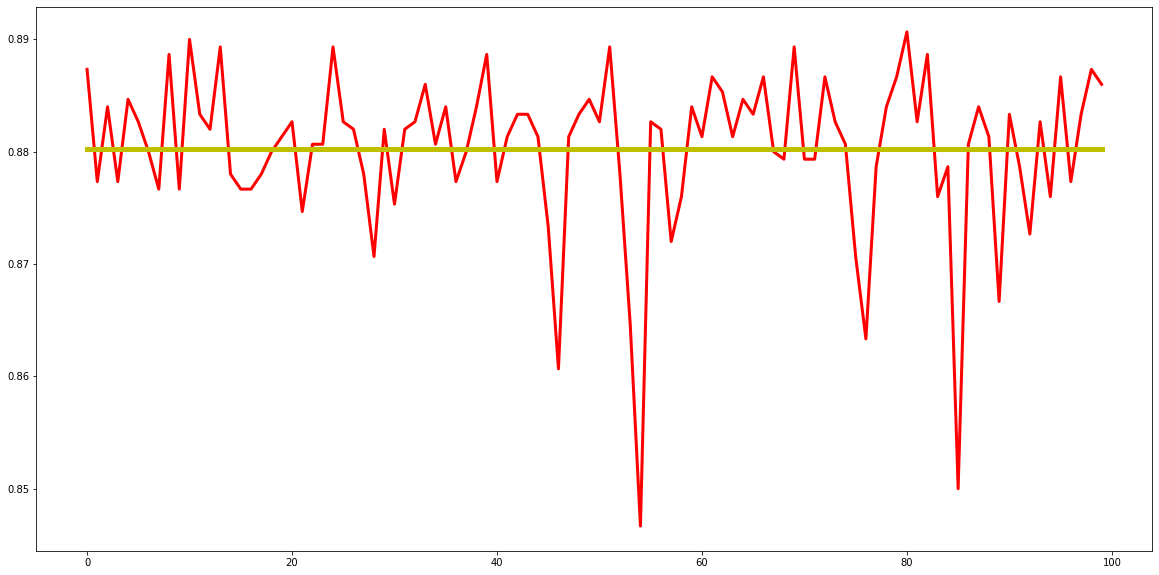

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"]=(20,10)
plt.plot(perf,"r",linewidth=3)
plt.plot(avg_perf,"y",linewidth=5)

In [ ]:
import pickle
pickle.dump(final_model,open('Target_Dtree.pk','wb'))